In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-08-15 13:02:02.216344


<h1>Matplotlib - osa 3</h1>
<h2>Histogrammi</h2>

Tämä on jatkoa sarjan kahdelle edelliselle osalle:

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

Käytän seuraavissa akselin jakoviivojen (ticks) sijoittelun ja ulkoasun tuunausta <b>matplotlib.ticker</b>-kirjaston toiminnoilla. Lue lisää https://matplotlib.org/stable/api/ticker_api.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tätä tarvitsen akselien tuunaamiseen
import matplotlib.ticker as ticker

In [3]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


<h2>Histogrammi</h2>

Histogrammia käytetään määrällisen muuttujan luokitellun jakauman esittämiseen. Histogrammissa pylväät ovat kiinni toisissaan. Voin erottaa pylväät toisistaan reunaviivalla (<b>edgecolor = 'white'</b>).

Oletuksena histogrammi jakaa muuttujan arvot kymmeneen luokkaan.

Seuraavassa tallennan kaavion muuttujan <b>ax1</b> arvoksi, jotta voin viitata kaavioon käyttäessäni <b>set_major_locator</b>-toimintoa.

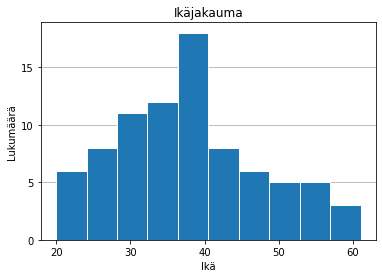

In [4]:
ax1 = df['ikä'].plot.hist(edgecolor = 'white', zorder = 2)

plt.title('Ikäjakauma')
plt.ylabel('Lukumäärä')
plt.xlabel('Ikä')

plt.grid(axis = 'y')

# Tuunaan y-akselin näyttämään arvot viiden välein
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))

Seuraavassa viimeistellympi histogrammi, jossa määrään käytettäväksi kuutta luokkaa (<b>bins = 6</b>).

Lukumäärien sijasta arvoakselilla on prosentit, joiden laskemiseen käytän <b>np.ones()</b>-kikkaa:
<ul>
    <li>Annan arvoille painokertoimet <b>weights</b>-lisäparametrina.</li>
    <li><b>np.ones(n)</b> tuottaa alkuperäisten arvojen sijasta pelkkiä ykkösiä. Kun ykkösen suuruisia arvoja summataan käyttäen painokertoimina 1/n, niin saadaan prosentteja.</li>
    <li>Kertomalla sadalla saadaan desimaalimuotoiset prosentit prosenttiluvuiksi.</li>
</ul>

(0.0, 35.0)

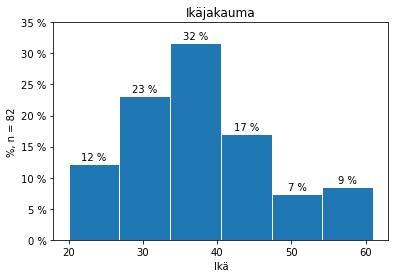

In [5]:
# Ikään liittyvien havaintojen lukumäärä
n = df['ikä'].count()

ax2 = df['ikä'].plot.hist(bins = 6, weights = np.ones(n) / n * 100, edgecolor = 'white')

plt.title('Ikäjakauma')
plt.ylabel('%, n = ' + str(n))
plt.xlabel('Ikä')

for bar in ax2.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f} %'.format(y)
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# %-merkit lukujen perään
ax2.yaxis.set_major_formatter(ticker.FuncFormatter('{:.0f} %'.format))

plt.ylim(0, 35)

Tarvittaessa voin käyttää epätasavälisiä luokkia. Tällöin määritän luokkarajat (<b>bins</b>) itse.

Havainnollisuuden parantamiseksi asetan x-akselin jakoviivat luokkarajojen kohdille (<b>plt.xticks(bins)</b>).

Huomaa, että epätasavälistä luokittelua käytettäessä pylvään leveys riippuu luokan leveydestä.

(0.0, 40.0)

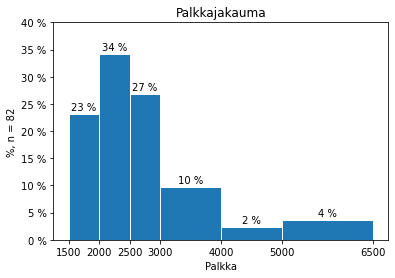

In [6]:
n = df['palkka'].count()
bins = [1500, 2000, 2500, 3000, 4000, 5000, 6500]

ax3 = df['palkka'].plot.hist(bins = bins, weights = np.ones(n)/n * 100, edgecolor = 'white')

plt.title('Palkkajakauma')
plt.ylabel('%, n = ' + str(n))
plt.xlabel('Palkka')
plt.xticks(bins)

for bar in ax3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f} %'.format(y)
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

ax3.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax3.yaxis.set_major_formatter(ticker.FuncFormatter('{:.0f} %'.format))
plt.ylim(0, 40)

<h2>Lisätietoa</h2>

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib4.ipynb käsittelee värien ja värikarttojen käyttöä